# Pandas


[Pandas](http://pandas.pydata.org) es una biblioteca para manipulación y análisis de datos basada en Numpy. Aporta nuevas estructuras de datos de alto nivel que extienden datos almacenados en arrays, aportando más semántica y nuevas operaciones. 

Puede pensarse a Pandas como un **reemplazo pythonico a excel**


Pandas introduce dos estructuras de datos principales: `Series` y `DataFrame`.  

In [10]:
import pandas as pd
%matplotlib inline

### Series

Un Series es un objeto **unidemensional**, similar a un array, una lista o una columna en una tabla, que tiene **asociado una etiqueta** para cada elemento. Por defecto, esta etiqueta es un número de 0 a N

In [11]:
s = pd.Series([1,3,5,float('nan'),6,8]) # creamos una serie, analogo a un array de 1D
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [12]:
pd.Series?

Init signature: pd.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)
Docstring:     
One-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object
supports both integer- and label-based indexing and provides a host of
methods for performing operations involving the index. Statistical
methods from ndarray have been overridden to automatically exclude
missing data (currently represented as NaN).

Operations between Series (+, -, /, *, **) align values based on their
associated index values-- they need not be the same length. The result
index will be the sorted union of the two indexes.

Parameters
----------
data : array-like, dict, or scalar value
    Contains data stored in Series

    .. versionchanged :: 0.23.0
       If data is a dict, argument order is maintained for Python 3.6
       and later.

index : array-like or Index (1d)
    Values must be hashable and have the same length 

Como vemos, es simplemente un envoltorio más lindo: el verdadero contenedor es un array de numpy

In [13]:
s.values

array([ 1.,  3.,  5., nan,  6.,  8.])

In [14]:
s.ndim, s.shape

(1, (6,))

In [15]:
s.index

RangeIndex(start=0, stop=6, step=1)

En este caso ocurre que el índice y las claves son lo mismo, pero esto puede no ocurrir para objetos más completos

In [16]:
s.loc[1]

3.0

Hay muchas operaciones que podemos hacer sobre una serie.

In [17]:
s.mean(), s.sum(), s.std()

(4.6, 23.0, 2.701851217221259)

E incluso ver un resumen general de los datos

In [18]:
s.describe()

count    5.000000
mean     4.600000
std      2.701851
min      1.000000
25%      3.000000
50%      5.000000
75%      6.000000
max      8.000000
dtype: float64

Pandas es una herramienta nacida en la industria de las finanzas, y por ello intenta hacer fácil las cosas tipicas. Una de ellas es **graficar datos**. Utiliza **matplotlib** por default

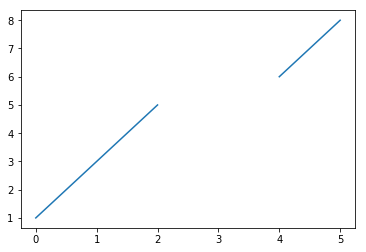

In [19]:
s.plot()

La series se utilizan mucho para representar datos en **función del tiempo**. Hay una función especial análoga a `range()` que permite generar índices temporales

In [20]:
pd.date_range('1/1/2010', periods=1000)

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2012-09-17', '2012-09-18', '2012-09-19', '2012-09-20',
               '2012-09-21', '2012-09-22', '2012-09-23', '2012-09-24',
               '2012-09-25', '2012-09-26'],
              dtype='datetime64[ns]', length=1000, freq='D')

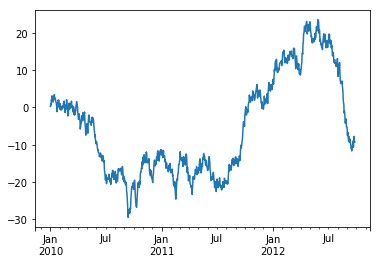

In [39]:
import random

ts = pd.Series([random.gauss(0, 1) for _ in range(1000)], index=pd.date_range('1/1/2010', periods=1000))
ts = ts.cumsum()
ts.plot()

### Dataframe

Un DataFrame es una estructura tabular de **filas y columnas** (¡como una hoja de cálculo!). También se puede pensar un DataFrame como un conjunto de Series que comparten el índice (es decir, la primera columna)

In [43]:
df = pd.DataFrame([[random.gauss(0, 1) for _ in range(4)] for _ in range(1000)], index=ts.index, columns=list('ABCD'))
df.head()

,A,B,C,D
2010-01-01,0.858506,0.783871,0.294667,-0.962207
2010-01-02,-0.234159,-0.905093,0.597738,-0.097250
2010-01-03,0.800701,-1.765603,0.295400,-0.055411
2010-01-04,1.081189,0.886123,-0.518027,0.454492
2010-01-05,0.141107,-0.922221,0.577094,0.345323


In [44]:
df.tail()

,A,B,C,D
2012-09-22,0.278088,-1.397676,2.120591,1.523929
2012-09-23,0.736567,0.464031,-2.457047,1.950330
2012-09-24,-0.008521,2.334998,0.072778,-0.354868
2012-09-25,0.323083,0.498607,0.429016,-0.451234
2012-09-26,-1.111069,0.776390,0.076299,-0.478972


Las columnas son Series!

In [45]:
type(df.A)

pandas.core.series.Series

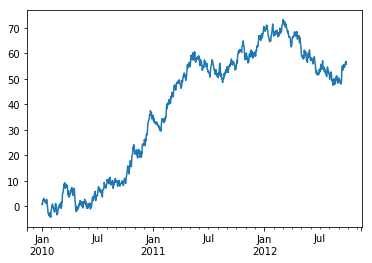

In [46]:
df["A"].cumsum().plot()

Pandas tambien puede importar archivos CSV o Excel, locales o remotos. Por ejemplo este [dataset](https://git.io/fjncX) de pasajeros del titanic

In [53]:
url = 'https://git.io/fjncX'
titanic = pd.read_csv(url, index_col=0, na_values='N/A')

In [51]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

| Variable | Definicion                                 | Notacion                                       |
|----------|--------------------------------------------|------------------------------------------------|
| survival | ¿Sobrevivio?                               | 0 = No, 1 = Si                                 |
| pclass   | Clase del tiquete                          | 1 = Alta, 2 = Media, 3 = Baja                  |
| sex      | Sexo                                       |                                                |
| Age      | Edad (en años)                             |                                                |
| sibsp    | # Hermanos / cónyuges abordo               |                                                |
| parch    | # Hijos / Padres abordo                    |                                                |
| ticket   | Numero de tiquete                          |                                                |
| fare     | Tarifa                                     |                                                |
| cabin    | Numero de cabina                           |                                                |
| embarked | Puerto de embarque                         | C = Cherbourg, Q = Queenstown, S = Southampton |

In [54]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


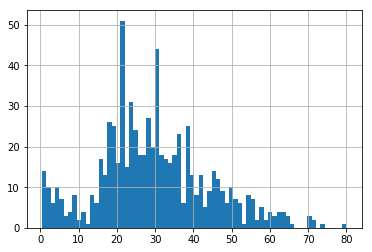

In [91]:
titanic.Age.hist(bins=70)

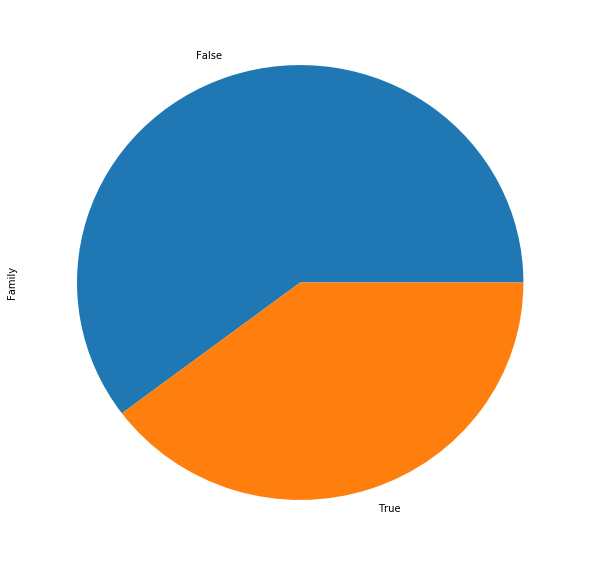

In [87]:
titanic['Family'] = (titanic.SibSp + titanic.Parch) > 0
titanic.Family.value_counts().plot(kind='pie', figsize=(10,10))

Podemos filtrar el dataset por múltiples criterios. Por ejemplo, para calcular la proporcion de mujeres menores que murieron 

In [55]:
titanic[(titanic.Sex == 'female') & (titanic.Age < 18)].Survived.mean()

0.6909090909090909

Podemos separar subconjuntos basado en uno o más criterios

In [56]:
titanic.groupby('Pclass').describe()

Age                                                       Fare  \
        count       mean        std   min   25%   50%   75%   max  count   
Pclass                                                                     
1       186.0  38.233441  14.802856  0.92  27.0  37.0  49.0  80.0  216.0   
2       173.0  29.877630  14.001077  0.67  23.0  29.0  36.0  70.0  184.0   
3       355.0  25.140620  12.495398  0.42  18.0  24.0  32.0  74.0  491.0   

                  ...  SibSp      Survived                                     \
             mean ...    75%  max    count      mean       std  min  25%  50%   
Pclass            ...                                                           
1       84.154687 ...    1.0  3.0    216.0  0.629630  0.484026  0.0  0.0  1.0   
2       20.662183 ...    1.0  3.0    184.0  0.472826  0.500623  0.0  0.0  0.0   
3       13.675550 ...    1.0  8.0    491.0  0.242363  0.428949  0.0  0.0  0.0   

                  
        75%  max  
Pclass            
1       1.0  1.0  
2       1.0  1.0  
3       0.0  1.0  

[3 rows x 40 columns]

In [88]:
titanic.groupby(['Pclass', 'Family']).Survived.mean()

Pclass  Family
1       False     0.532110
        True      0.728972
2       False     0.346154
        True      0.637500
3       False     0.212963
        True      0.299401
Name: Survived, dtype: float64

In [89]:
pt1 = pd.pivot_table(titanic, index=['Pclass'], columns=['Family'], values=['Survived'])
pt1

Survived          
Family     False     True 
Pclass                    
1       0.532110  0.728972
2       0.346154  0.637500
3       0.212963  0.299401

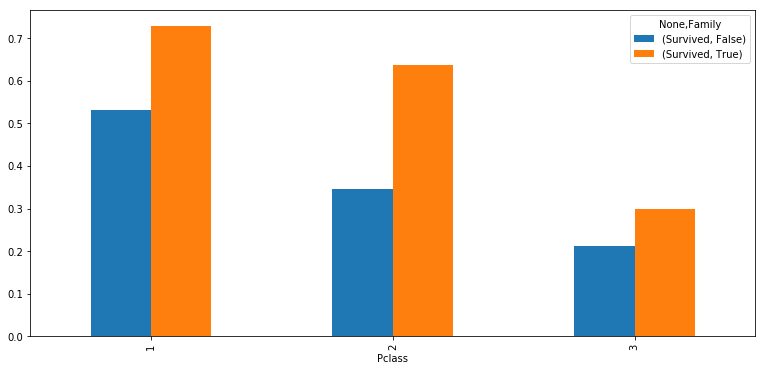

In [90]:
pt1.plot(kind='bar', figsize=(13,6))

In [117]:
titanic.Name.head(10)

PassengerId
1                               Braund, Mr. Owen Harris
2     Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                Heikkinen, Miss. Laina
4          Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                              Allen, Mr. William Henry
6                                      Moran, Mr. James
7                               McCarthy, Mr. Timothy J
8                        Palsson, Master. Gosta Leonard
9     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [122]:
x = titanic.loc[1].Name
x

'Braund, Mr. Owen Harris'

In [123]:
x.split('.')[0]

'Braund, Mr'

In [124]:
x.split('.')[0].split(', ')[1]

'Mr'

In [125]:
titanic['FirstName'] = titanic.Name.apply(lambda x: x.split('.')[0].split(', ')[1])
titanic.FirstName.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Mme               1
Capt              1
Jonkheer          1
the Countess      1
Lady              1
Don               1
Sir               1
Ms                1
Name: FirstName, dtype: int64